1. Suited for linear models (lin reg, log reg) as it doesnt affect the distribution and variance as much
2. Disturbs covariance due to randomness

Numerical Data

In [215]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
dataframe = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
dataframe.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [217]:
dataframe.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [218]:
X = dataframe.drop(columns=['Survived'])
Y = dataframe['Survived']

In [219]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [220]:
X_train['Age_Imputed'] = X_train['Age']
X_test['Age_Imputed'] = X_test['Age']

In [221]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\rohit\AppData\Local\Temp\ipykernel_7460\2836983312.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:

In [222]:
X_train

,Age,Fare,Age_Imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,24.0
493,71.0,49.5042,71.0
527,NaN,221.7792,64.0


C:\Users\rohit\AppData\Local\Temp\ipykernel_7460\2276714742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original')
C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_7460\2276714742.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-lev

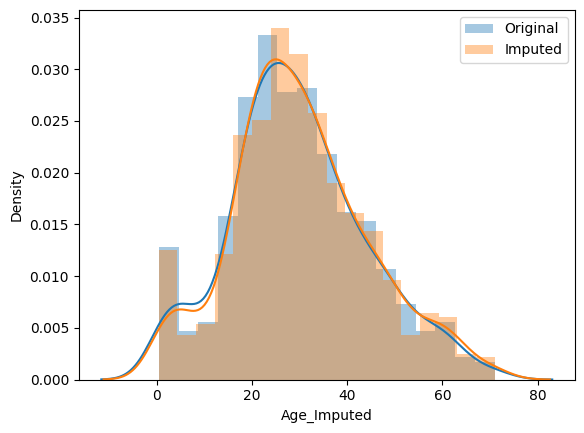

In [223]:
sns.distplot(X_train['Age'],label='Original')
sns.distplot(X_train['Age_Imputed'],label='Imputed')
plt.legend()
plt.show()

In [224]:
print('Original variance: ',X_train['Age'].var())
print('Imputed variance: ',X_train['Age_Imputed'].var())

Original variance:  204.34951339046142
Imputed variance:  207.01679804358477


C:\Users\rohit\AppData\Local\Temp\ipykernel_7460\3617238217.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test['Age'],label='Original')
C:\Users\rohit\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Temp\ipykernel_7460\3617238217.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-leve

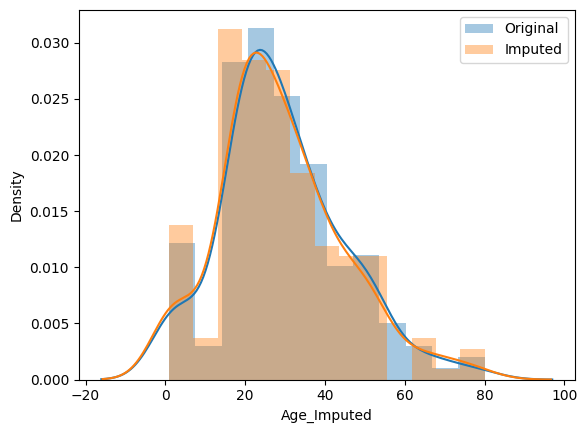

In [225]:
sns.distplot(X_test['Age'],label='Original')
sns.distplot(X_test['Age_Imputed'],label='Imputed')
plt.legend()
plt.show()

In [226]:
print('Original variance: ',X_test['Age'].var())
print('Imputed variance: ',X_test['Age_Imputed'].var())

Original variance:  237.50093573154362
Imputed variance:  245.39902137969995


In [227]:
X_train[['Fare','Age','Age_Imputed']].cov()

,Fare,Age,Age_Imputed
Fare,2368.246832,71.512440,56.479607
Age,71.512440,204.349513,204.349513
Age_Imputed,56.479607,204.349513,207.016798


<Axes: >

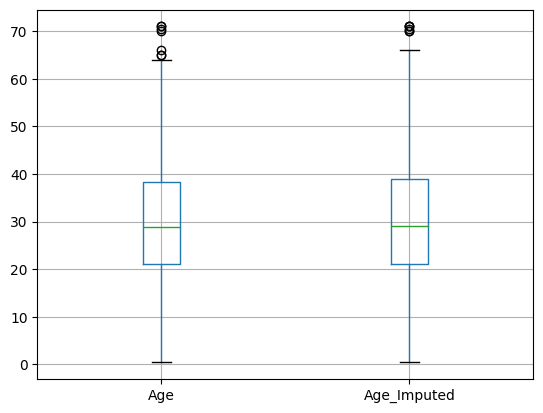

In [228]:
X_train[['Age','Age_Imputed']].boxplot()

In [229]:
#deployment robust code to generate same random number for same input of fare
#sampled_data = X_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

Categorical Values

In [230]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [231]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [232]:
X = data
Y = data['SalePrice']

In [233]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [234]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [235]:
temp = pd.concat([
    X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts()/len(X_train)
],axis=1)
temp.columns = ['original','imputed']
temp

,original,imputed
TA,0.951043,0.898116
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [236]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts()/len(X_train)
],axis=1)
temp.columns = ['original','imputed']
temp

,original,imputed
Gd,0.494272,0.258562
TA,0.412439,0.215753
Fa,0.040917,0.021404
Po,0.027823,0.014555
Ex,0.024550,0.012842
